# Imports

In [ ]:
import requests
import os
from torch_geometric.data import Dataset
import torch
import networkx as nx
import matplotlib.pyplot as plt
import random
import operator
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
random.seed(100)

# Load Data

In [2]:
#%%
class HW3Dataset(Dataset):
    url = 'https://technionmail-my.sharepoint.com/:u:/g/personal/ploznik_campus_technion_ac_il/EUHUDSoVnitIrEA6ALsAK1QBpphP5jX3OmGyZAgnbUFo0A?download=1'

    def __init__(self, root, transform=None, pre_transform=None):
        super(HW3Dataset, self).__init__(root, transform, pre_transform)

    @property
    def raw_file_names(self):
        return ['data.pt']

    @property
    def processed_file_names(self):
        return ['data.pt']

    def download(self):
        file_url = self.url.replace(' ', '%20')
        response = requests.get(file_url)

        if response.status_code != 200:
            raise Exception(f"Failed to download the file, status code: {response.status_code}")

        with open(os.path.join(self.raw_dir, self.raw_file_names[0]), 'wb') as f:
            f.write(response.content)

    def process(self):
        raw_path = os.path.join(self.raw_dir, self.raw_file_names[0])
        data = torch.load(raw_path)
        torch.save(data, self.processed_paths[0])

    def len(self):
        return 1

    def get(self, idx):
        return torch.load(self.processed_paths[0])


dataset = HW3Dataset(root='data/hw3/')
data = dataset[0]



# %%


Processing...
Done!


In [3]:
data

Data(x=[100000, 128], edge_index=[2, 444288], y=[100000, 1], node_year=[100000, 1], train_mask=[80000], val_mask=[20000])

In [4]:
data['edge_index'][1]

tensor([ 7011, 25441, 37198,  ..., 85106, 11090, 29200])

# Network Exploration

In [6]:
# Create an empty graph
G = nx.Graph()

# Add edges from the edge_index
edge_index = data.edge_index
G.add_edges_from(edge_index.t().tolist())

In [7]:
# Taking a sample of the data (10%)
sampled_nodes = random.sample(G.nodes, 10000)

<ipython-input-7-dd84ade59734>:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(G.nodes, 10000)


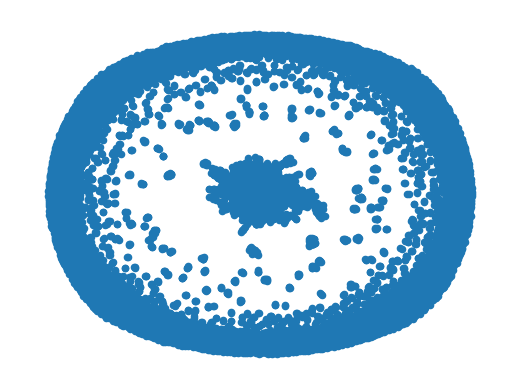

In [26]:
# Visualition of the full network
sample = G.subgraph(sampled_nodes)
nx.draw_networkx(sample, with_labels=False, node_size=20)
plt.axis('off')
plt.show()

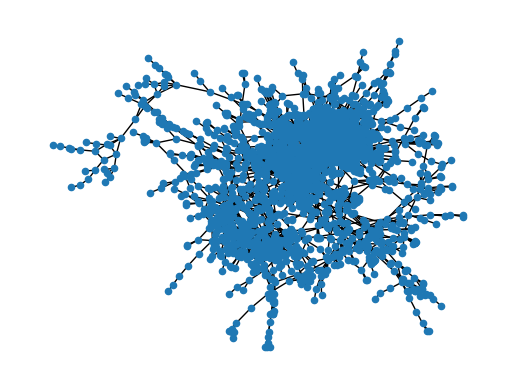

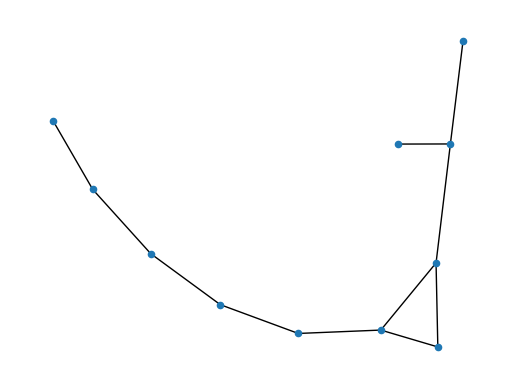

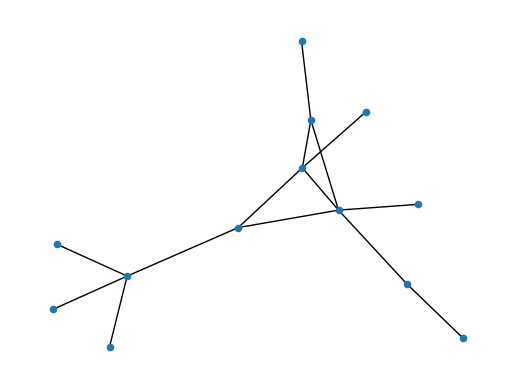

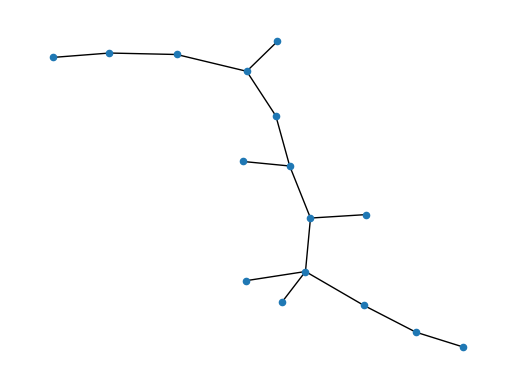

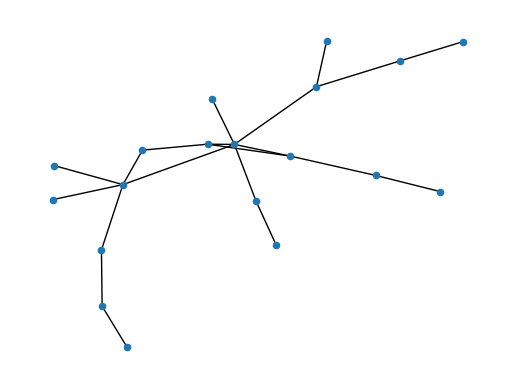

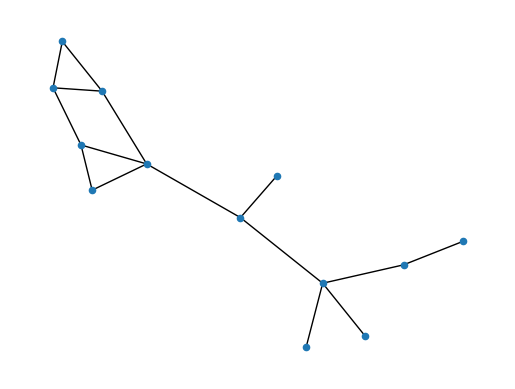

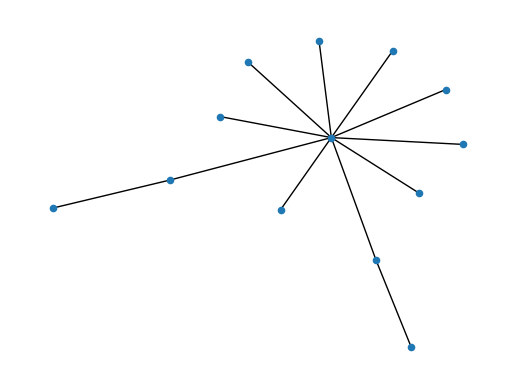

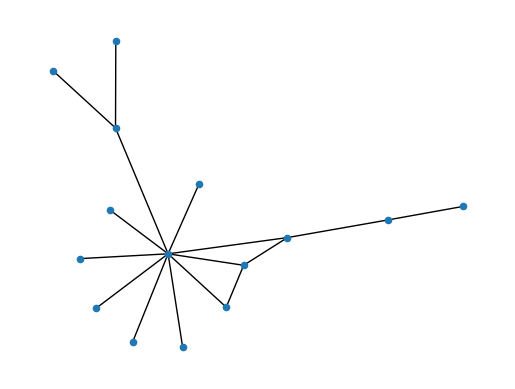

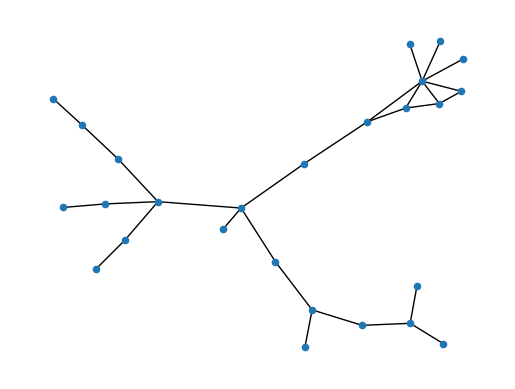

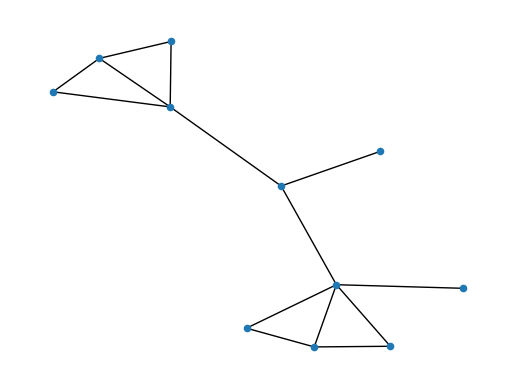

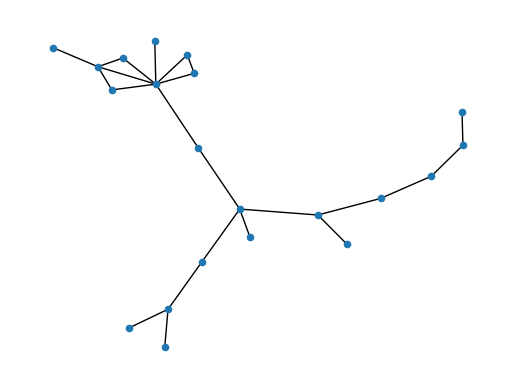

In [10]:
# Visualition of any conected components with more then 10 vartexes full network
for i, cc in enumerate(nx.connected_components(sample)):
  if len(sample.subgraph(cc).nodes) <= 10:
    continue
  nx.draw_networkx(sample.subgraph(cc), with_labels=False, node_size=20)
  plt.axis('off')
  plt.show()


In [11]:
labels = data.y.flatten().tolist()

In [12]:
get_colors = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
colors = get_colors(len(labels))
node_colors = [colors[label] for label in labels]

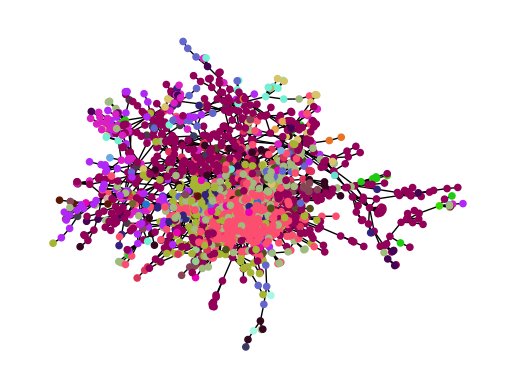

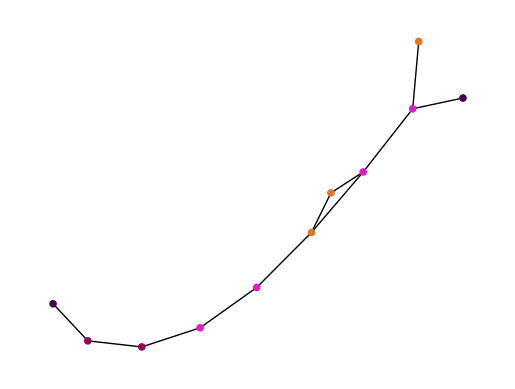

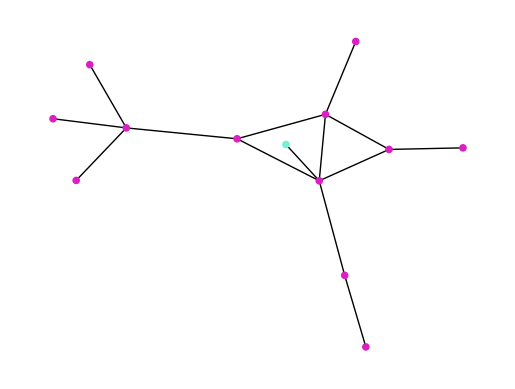

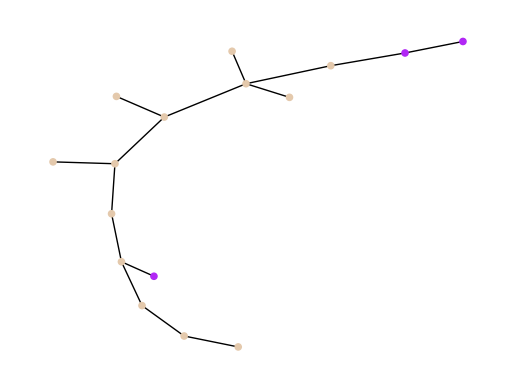

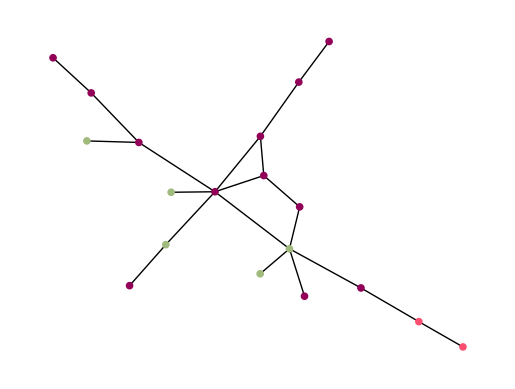

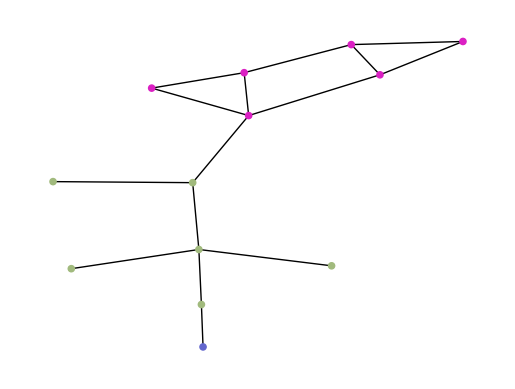

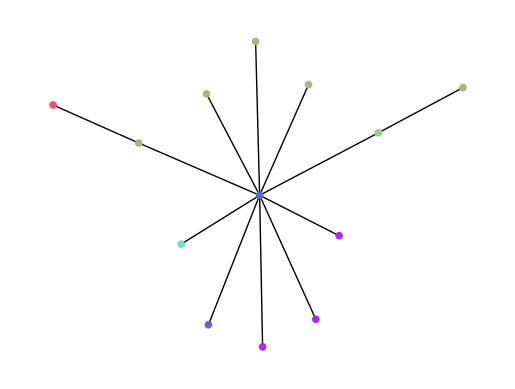

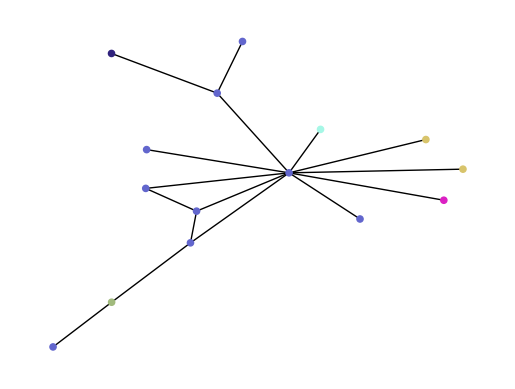

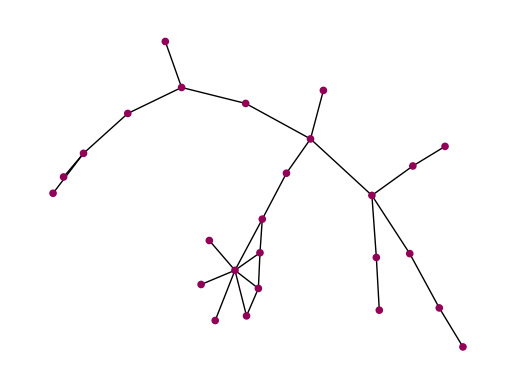

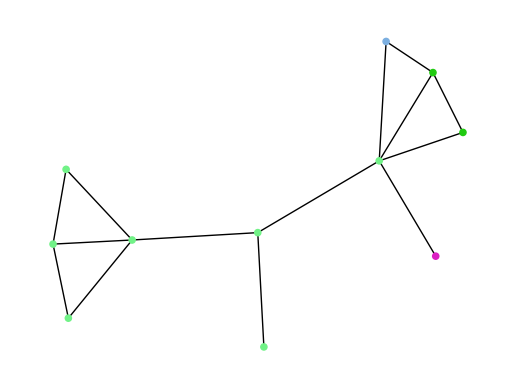

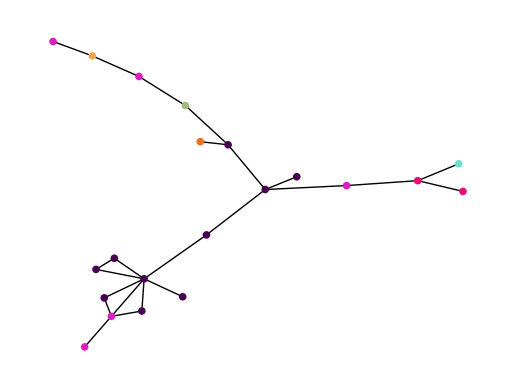

In [14]:
# Visualition of any conected components with more then 10 vartexes full network - with colors

for i, cc in enumerate(nx.connected_components(sample)):
  if len(sample.subgraph(cc).nodes) <= 10:
    continue
  nx.draw_networkx(sample.subgraph(cc), with_labels=False, node_color=operator.itemgetter(*list(sample.subgraph(cc).nodes))(node_colors), node_size=20)
  plt.axis('off')
  plt.show()

# Feature Vector Exploration


In [19]:
feature_vectors = data.x

In [20]:
pca = PCA(n_components=2)  # Specify the number of components you want to keep
transformed_vectors = pca.fit_transform(feature_vectors)

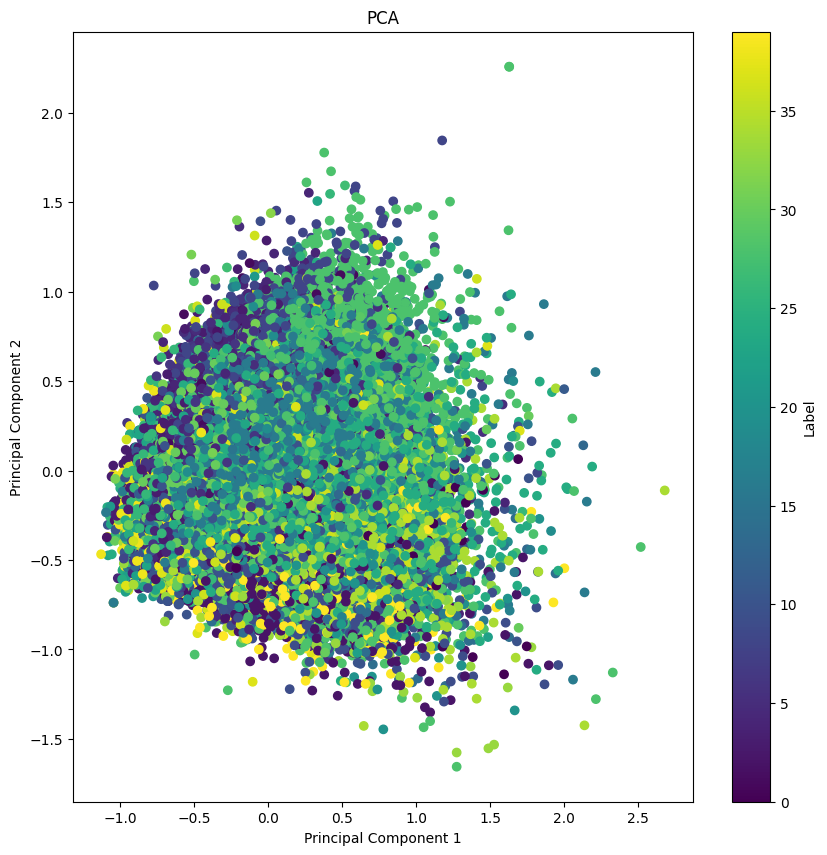

In [21]:
plt.figure(figsize=(10, 10))
plt.scatter(transformed_vectors[:, 0], transformed_vectors[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.colorbar(label='Label')
plt.show()

In [24]:
tsne = TSNE(n_components=2, random_state=42)  # Specify the number of components you want to visualize
transformed_vectors = tsne.fit_transform(feature_vectors[:5000])

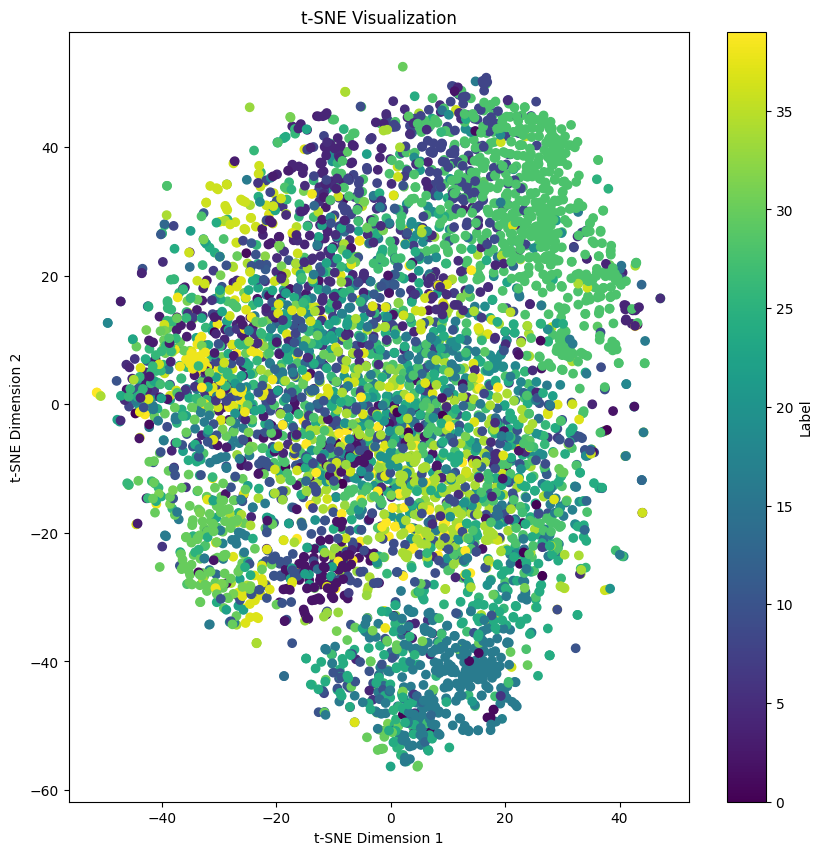

In [25]:
plt.figure(figsize=(10, 10))
plt.scatter(transformed_vectors[:, 0], transformed_vectors[:, 1], c=labels[:5000])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization')
plt.colorbar(label='Label')
plt.show()